In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

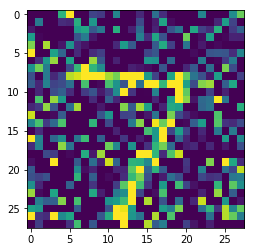

In [0]:
plt.imshow(np.reshape(x_test_noisy[0], (28,28)))

In [0]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) 
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
           )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.1785 - val_loss: 0.1240
Epoch 2/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1204 - val_loss: 0.1193
Epoch 3/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1126 - val_loss: 0.1098
Epoch 4/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1085 - val_loss: 0.1046
Epoch 5/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1058 - val_loss: 0.1043
Epoch 6/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1043 - val_loss: 0.1049
Epoch 7/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1032 - val_loss: 0.1003
Epoch 8/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1021 - val_loss: 0.1027
Epoch 9/100
60000/60000 [=====================

In [0]:
pred = autoencoder.predict(x_test)

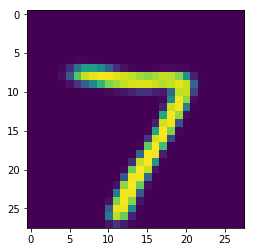

In [0]:
plt.imshow(np.reshape(pred[0],(28,28)))

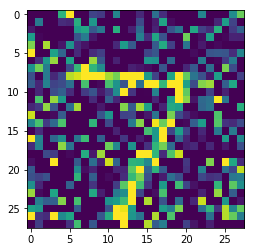

In [0]:
plt.imshow(np.reshape(x_test_noisy[0], (28,28)))

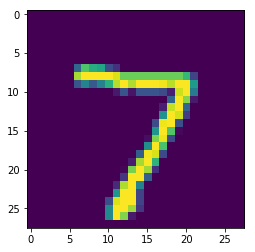

In [0]:
plt.imshow(np.reshape(x_test[0], (28,28)))

In [0]:
autoencoder.save('denoizer.h5')

In [0]:
from google.colab import files

In [0]:
files.download('denoizer.h5')

In [0]:
x_test[0].shape

(28, 28, 1)